In [1]:
import numpy as np
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("dly532_processed.csv", header=0)
X3 = df.iloc[:, 3]
X4 = df.iloc[:, 4]
X5 = df.iloc[:, 5]
X6 = df.iloc[:, 6]
X9 = df.iloc[:, 9] # hg
X10 = df.iloc[:, 10]
X11 = df.iloc[:, 11]
X12 = df.iloc[:, 12]
X13 = df.iloc[:, 13] # soil
X14 = df.iloc[:, 14]
X15 = df.iloc[:, 15]
X18 = df.iloc[:, 18] # smd_pd
X = np.column_stack((X3,X4,X5,X6,X9,X10,X11,X12,X13,X14,X15,X18))
y = df.iloc[:, 19]

In [3]:
df.iloc[:,[3,4,5,6,9,10,12,13,14,15,18]].columns

Index(['igmin', 'gmin', 'cbl', 'wdsp', 'hg', 'sun', 'g_rad', 'soil', 'pe',
       'evap', 'smd_pd'],
      dtype='object')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
def plot_cv(fig_num, title, param, scores, std_error, param_name):
    plt.figure(1, figsize=(5,2))
    plt.subplot(1, 1, fig_num)
#     plt.title(title)
    plt.plot(param, scores + std_error, 'b--')
    plt.plot(param, scores - std_error, 'b--')
    # alpha=0.2 controls the translucency of the fill color
    plt.fill_between(param, scores + std_error, scores - std_error, alpha=0.2)
    plt.ylabel('CV score +/- std error')
    plt.xlabel(param_name)
    plt.axhline(np.max(scores), linestyle='--', color='.5')
    plt.xlim([param[0], param[-1]])

In [6]:
def plot_mse(fig_num, title, alpha, mse):
    plt.figure(1, figsize=(10,3))
    plt.subplot(1, 2, fig_num)
    plt.title(title)
    plt.semilogx(alpha, mse, ':')
    plt.plot(alpha, mse.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)
    plt.axvline(alpha, linestyle='--', color='k',
                label='alpha: CV estimate')
    plt.xlabel("alpha range")
    plt.ylabel("Mean Squared Error")
    plt.legend()

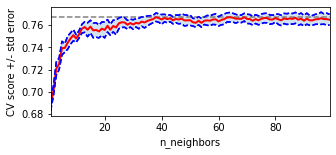

In [22]:
parameters = {'n_neighbors': range(1,100)}
knn = KNeighborsClassifier()

clf = GridSearchCV(knn, param_grid=parameters, cv=5)
clf.fit(X_train, y_train)
result_knn_df = pd.DataFrame(clf.cv_results_)  
result_knn_df.to_csv('knn_cv_results.csv')
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(5)
plot_cv(1, "KNN K Range Scores", range(1,100), scores, std_error, "n_neighbors")
plt.plot(range(1,100), scores, 'r-', linewidth=2)
plt.plot(range(1,100), scores + std_error, 'b--')
plt.plot(range(1,100), scores - std_error, 'b--')
plt.show()

In [19]:
result_knn_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
68,0.002862,0.000140,0.104301,0.002519,69,{'n_neighbors': 69},0.764540,0.758685,0.781221,0.762441,0.769014,0.767180,0.007773,1
63,0.002824,0.000087,0.108998,0.001849,64,{'n_neighbors': 64},0.768293,0.753052,0.783099,0.765258,0.766197,0.767180,0.009580,2
37,0.002989,0.000303,0.091349,0.002400,38,{'n_neighbors': 38},0.770169,0.759624,0.773709,0.777465,0.754930,0.767179,0.008538,3
62,0.002915,0.000249,0.107126,0.002814,63,{'n_neighbors': 63},0.769231,0.751174,0.779343,0.765258,0.769953,0.766992,0.009160,4
64,0.003533,0.000406,0.123288,0.016744,65,{'n_neighbors': 65},0.766417,0.754930,0.780282,0.760563,0.771831,0.766804,0.008798,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.011499,0.016412,0.100273,0.029355,5,{'n_neighbors': 5},0.742026,0.740845,0.759624,0.738028,0.716432,0.739391,0.013765,95
3,0.003302,0.000433,0.073722,0.001423,4,{'n_neighbors': 4},0.720450,0.729577,0.744601,0.723005,0.708920,0.725311,0.011730,96
2,0.002841,0.000094,0.069384,0.002430,3,{'n_neighbors': 3},0.719512,0.729577,0.741784,0.708920,0.705164,0.720992,0.013450,97
1,0.002916,0.000203,0.064429,0.001781,2,{'n_neighbors': 2},0.699812,0.698592,0.718310,0.700469,0.687324,0.700901,0.009941,98


In [15]:
clf.best_params_

{'n_neighbors': 69}

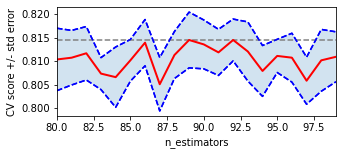

In [15]:
param_grid = {'n_estimators':np.arange(80,100)}
rfc= RandomForestClassifier()
gs = GridSearchCV(rfc, param_grid, cv=5)
gs.fit(X_train, y_train)
result_rf_df = pd.DataFrame(gs.cv_results_)  
result_rf_df.to_csv('rf_cv_results.csv')
scores = gs.cv_results_['mean_test_score']
scores_std = gs.cv_results_['std_test_score']
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(5)
plot_cv(1, "RF n_estimators Range Scores", np.arange(80,100), scores, std_error, "n_estimators")
plt.plot(np.arange(80,100), scores, 'r-', linewidth=2)
plt.plot(np.arange(80,100), scores + std_error, 'b--')
plt.plot(np.arange(80,100), scores - std_error, 'b--')
plt.show()

In [17]:
result_rf_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.523154,0.023848,0.022597,0.000961,92,{'n_estimators': 92},0.812383,0.809390,0.828169,0.822535,0.800000,0.814495,0.009922,1
9,0.524779,0.013032,0.022251,0.001094,89,{'n_estimators': 89},0.821764,0.806573,0.835681,0.811268,0.797183,0.814494,0.013225,2
6,0.482461,0.016383,0.020371,0.001345,86,{'n_estimators': 86},0.821764,0.806573,0.828169,0.815962,0.797183,0.813930,0.010980,3
10,0.482216,0.015931,0.025088,0.009841,90,{'n_estimators': 90},0.818011,0.803756,0.832864,0.813146,0.800000,0.813555,0.011598,4
13,0.508335,0.003114,0.021309,0.000379,93,{'n_estimators': 93},0.817073,0.802817,0.835681,0.810329,0.794366,0.812053,0.014033,5
11,0.518369,0.023568,0.021044,0.001307,91,{'n_estimators': 91},0.818949,0.800939,0.828169,0.812207,0.799061,0.811865,0.010949,6
2,0.443329,0.004380,0.018437,0.000202,82,{'n_estimators': 82},0.819887,0.798122,0.829108,0.815023,0.796244,0.811677,0.012684,7
8,0.518791,0.030034,0.020197,0.000523,88,{'n_estimators': 88},0.819887,0.800000,0.828169,0.808451,0.800000,0.811301,0.011152,8
15,0.529190,0.009140,0.022885,0.001830,95,{'n_estimators': 95},0.814259,0.807512,0.824413,0.808451,0.800939,0.811115,0.007879,9
19,0.533832,0.002587,0.022267,0.000403,99,{'n_estimators': 99},0.813321,0.807512,0.831925,0.805634,0.796244,0.810927,0.011848,10


In [18]:
gs.best_params_

{'n_estimators': 92}

In [7]:
c_range = [0.001, 0.01, 0.05, 0.1, 1, 5, 10, 15]
param_grid = {'C': c_range}  
svm_model = LinearSVC()
svm = GridSearchCV(svm_model, param_grid, cv=5)
svm.fit(X_train, y_train)
result_svm_df = pd.DataFrame(svm.cv_results_)  
result_svm_df.to_csv('svm_cv_results.csv')
scores = svm.cv_results_['mean_test_score']
scores_std = svm.cv_results_['std_test_score']
# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(5)
plot_cv(1, "SVM C Range Scores", c_range, scores, std_error, "C")
plt.plot(c_range, scores, 'r-', linewidth=2)
plt.plot(c_range, scores + std_error, 'b--')
plt.plot(c_range, scores - std_error, 'b--')
plt.show()

/Users/xinyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/xinyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/xinyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/xinyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/xinyu/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/Users/xinyu/opt/anaconda3/lib/python3.7/site-packages/

KeyboardInterrupt: 

In [ ]:
result_svm_df.sort_values(by='rank_test_score')

In [16]:
svm.best_params_

{'C': 0.01}